In [1]:
#Imports
import pandas as pd
from scipy.stats import linregress
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Locate in CSVs
censusDataRead = "../ETL/ETL-Results/census_data.csv"
mortDataRead = "../ETL/ETL-Results/four_mort_measures.csv"

In [3]:
#Read CSVs
censusData = pd.read_csv(censusDataRead, sep=",")
mortData = pd.read_csv(mortDataRead, sep=",")

In [4]:
#View census data
censusData.head()

,County Name,State,State Abbr,Household Median Income,Family's Median Income,Total Population,Percent Poverty,Percent Veteran,Percent Married,Percent Bachelor,Percent One Race White,Percent One Race Black+,Percent One Race American Indian+,Percent One Race Asian,Percent One Race Hawaiian+,Percent One Race Some Other,Percent Two Race Or More,State Code,County Code
0,FAYETTE,Illinois,IL,46650,57836,21565,17.2,8.0,49.5,11.3,93.9,4.7,0.3,0.5,0.1,0.1,0.4,17,51
1,LOGAN,Illinois,IL,57308,74457,29003,9.3,8.1,48.8,19.9,88.5,6.9,0.3,0.8,0.0,0.8,2.8,17,107
2,SALINE,Illinois,IL,44090,54492,23994,21.1,8.6,51.1,19.2,92.7,2.6,0.2,0.7,0.2,0.5,3.0,17,165
3,LAKE,Illinois,IL,89427,108478,701473,7.9,5.8,54.7,45.3,75.8,6.8,0.3,7.7,0.0,6.5,2.9,17,97
4,MASSAC,Illinois,IL,47481,61028,14219,16.7,9.3,56.6,13.9,91.1,5.8,0.0,0.2,0.0,0.0,2.8,17,127


In [5]:
#Drop race for Erica
censusDataDrop = censusData.drop(columns=['Percent One Race White', 'Percent One Race Black+', 'Percent One Race American Indian+', 'Percent One Race Asian', 'Percent One Race Hawaiian+', 'Percent One Race Some Other', 'Percent Two Race Or More'])
demoDataGen = censusDataDrop
demoDataGen.head()

,County Name,State,State Abbr,Household Median Income,Family's Median Income,Total Population,Percent Poverty,Percent Veteran,Percent Married,Percent Bachelor,State Code,County Code
0,FAYETTE,Illinois,IL,46650,57836,21565,17.2,8.0,49.5,11.3,17,51
1,LOGAN,Illinois,IL,57308,74457,29003,9.3,8.1,48.8,19.9,17,107
2,SALINE,Illinois,IL,44090,54492,23994,21.1,8.6,51.1,19.2,17,165
3,LAKE,Illinois,IL,89427,108478,701473,7.9,5.8,54.7,45.3,17,97
4,MASSAC,Illinois,IL,47481,61028,14219,16.7,9.3,56.6,13.9,17,127


In [6]:
# Combine the data into a single dataset
genDataComplete = pd.merge(mortData, demoDataGen, how = "inner", right_on = ["State Abbr", "County Name"],
                        left_on = ["State", "County Name"])
#View DF
genDataComplete.head()

,Facility ID,Facility Name,Address,City,State_x,ZIP Code,County Name,Measure ID,Measure Name,Denominator,...,State Abbr,Household Median Income,Family's Median Income,Total Population,Percent Poverty,Percent Veteran,Percent Married,Percent Bachelor,State Code,County Code
0,50704,MISSION COMMUNITY HOSPITAL,14850 ROSCOE BLVD,PANORAMA CITY,CA,91402,LOS ANGELES,MORT_30_COPD,Death rate for COPD patients,207,...,CA,68044,76673,10081570,14.9,3.3,42.9,32.5,6,37
1,50625,CEDARS-SINAI MEDICAL CENTER,8700 BEVERLY BLVD,LOS ANGELES,CA,90048,LOS ANGELES,MORT_30_COPD,Death rate for COPD patients,504,...,CA,68044,76673,10081570,14.9,3.3,42.9,32.5,6,37
2,50739,CENTINELA HOSPITAL MEDICAL CENTER,555 EAST HARDY STREET,INGLEWOOD,CA,90301,LOS ANGELES,MORT_30_HF,Death rate for heart failure patients,568,...,CA,68044,76673,10081570,14.9,3.3,42.9,32.5,6,37
3,50763,"L A DOWNTOWN MEDICAL CENTER, LLC",1711 WEST TEMPLE STREET,LOS ANGELES,CA,90026,LOS ANGELES,MORT_30_COPD,Death rate for COPD patients,166,...,CA,68044,76673,10081570,14.9,3.3,42.9,32.5,6,37
4,50096,"WEST COVINA MEDICAL CENTER, INC",725 S ORANGE AVE,WEST COVINA,CA,91790,LOS ANGELES,MORT_30_COPD,Death rate for COPD patients,146,...,CA,68044,76673,10081570,14.9,3.3,42.9,32.5,6,37


In [7]:
#Filter to Oregon
ORGenData = genDataComplete.loc[genDataComplete["State_x"] == "OR"]
ORGenData.head()

,Facility ID,Facility Name,Address,City,State_x,ZIP Code,County Name,Measure ID,Measure Name,Denominator,...,State Abbr,Household Median Income,Family's Median Income,Total Population,Percent Poverty,Percent Veteran,Percent Married,Percent Bachelor,State Code,County Code
642,38003F,PORTLAND VA MEDICAL CENTER,3710 SW US VETERANS HOSPITAL,PORTLAND,OR,97239,MULTNOMAH,MORT_30_COPD,Death rate for COPD patients,430,...,OR,69176,86969,804606,13.8,5.8,42.4,45.9,41,51
643,38003F,PORTLAND VA MEDICAL CENTER,3710 SW US VETERANS HOSPITAL,PORTLAND,OR,97239,MULTNOMAH,MORT_30_HF,Death rate for heart failure patients,667,...,OR,69176,86969,804606,13.8,5.8,42.4,45.9,41,51
644,380007,LEGACY EMANUEL MEDICAL CENTER,2801 N GANTENBEIN AVENUE,PORTLAND,OR,97227,MULTNOMAH,MORT_30_COPD,Death rate for COPD patients,80,...,OR,69176,86969,804606,13.8,5.8,42.4,45.9,41,51
645,380025,LEGACY MOUNT HOOD MEDICAL CENTER,24800 SE STARK STREET,GRESHAM,OR,97030,MULTNOMAH,MORT_30_COPD,Death rate for COPD patients,98,...,OR,69176,86969,804606,13.8,5.8,42.4,45.9,41,51
646,380060,ADVENTIST HEALTH PORTLAND,10123 SE MARKET STREET,PORTLAND,OR,97216,MULTNOMAH,MORT_30_COPD,Death rate for COPD patients,103,...,OR,69176,86969,804606,13.8,5.8,42.4,45.9,41,51


In [10]:
COPD = ORGenData.loc[ORGenData["Measure Name"] == "Death rate for COPD patients"]
COPD.head()

,Facility ID,Facility Name,Address,City,State_x,ZIP Code,County Name,Measure ID,Measure Name,Denominator,...,State Abbr,Household Median Income,Family's Median Income,Total Population,Percent Poverty,Percent Veteran,Percent Married,Percent Bachelor,State Code,County Code
642,38003F,PORTLAND VA MEDICAL CENTER,3710 SW US VETERANS HOSPITAL,PORTLAND,OR,97239,MULTNOMAH,MORT_30_COPD,Death rate for COPD patients,430,...,OR,69176,86969,804606,13.8,5.8,42.4,45.9,41,51
644,380007,LEGACY EMANUEL MEDICAL CENTER,2801 N GANTENBEIN AVENUE,PORTLAND,OR,97227,MULTNOMAH,MORT_30_COPD,Death rate for COPD patients,80,...,OR,69176,86969,804606,13.8,5.8,42.4,45.9,41,51
645,380025,LEGACY MOUNT HOOD MEDICAL CENTER,24800 SE STARK STREET,GRESHAM,OR,97030,MULTNOMAH,MORT_30_COPD,Death rate for COPD patients,98,...,OR,69176,86969,804606,13.8,5.8,42.4,45.9,41,51
646,380060,ADVENTIST HEALTH PORTLAND,10123 SE MARKET STREET,PORTLAND,OR,97216,MULTNOMAH,MORT_30_COPD,Death rate for COPD patients,103,...,OR,69176,86969,804606,13.8,5.8,42.4,45.9,41,51
647,380061,PROVIDENCE PORTLAND MEDICAL CENTER,4805 NE GLISAN STREET,PORTLAND,OR,97213,MULTNOMAH,MORT_30_COPD,Death rate for COPD patients,148,...,OR,69176,86969,804606,13.8,5.8,42.4,45.9,41,51


The r-value is: -0.3131801417915908
The r2-value is: 0.09808180121260093
The p-value is: 0.02523867193336639


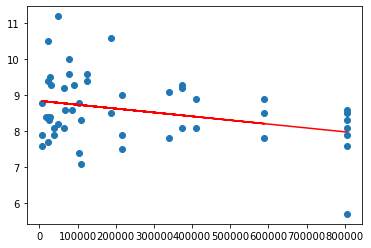

In [25]:
# Plot a scatter and regression Total Population, and COPD Deaths

slope, intercept, rvalue, pvalue, stderr = linregress(COPD["Total Population"], COPD["Score"])
regress_values = COPD["Total Population"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
fig, ax = plt.subplots()
ax.plot(COPD["Total Population"], regress_values, "r-")
ax.scatter(COPD["Total Population"], COPD["Score"])
print(f"The r-value is: {rvalue}")
print(f"The r2-value is: {rvalue**2}")
print(f"The p-value is: {pvalue}")
plt.show()

The r-value is: 0.10029985731949974
The r2-value is: 0.010060061378312005
The p-value is: 0.48374264611758455


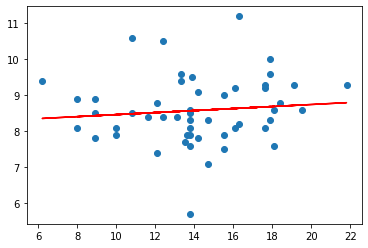

In [21]:
# Plot a scatter and regression Poverty, and COPD Deaths

slope, intercept, rvalue, pvalue, stderr = linregress(COPD["Percent Poverty"], COPD["Score"])
regress_values = COPD["Percent Poverty"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
fig, ax = plt.subplots()
ax.plot(COPD["Percent Poverty"], regress_values, "r-")
ax.scatter(COPD["Percent Poverty"], COPD["Score"])
print(f"The r-value is: {rvalue}")
print(f"The r2-value is: {rvalue**2}")
print(f"The p-value is: {pvalue}")
plt.show()

The r-value is: 0.1554806450221592
The r2-value is: 0.024174230976506676
The p-value is: 0.2759471876468655


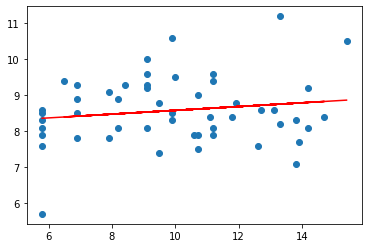

In [26]:
# Plot a scatter and regression Poverty, and COPD Deaths

slope, intercept, rvalue, pvalue, stderr = linregress(COPD["Percent Veteran"], COPD["Score"])
regress_values = COPD["Percent Veteran"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
fig, ax = plt.subplots()
ax.plot(COPD["Percent Veteran"], regress_values, "r-")
ax.scatter(COPD["Percent Veteran"], COPD["Score"])
print(f"The r-value is: {rvalue}")
print(f"The r2-value is: {rvalue**2}")
print(f"The p-value is: {pvalue}")
plt.show()

In [8]:
# Plot a scatter and regression of annual river depth and salmon counts to see if any correlation

slope, intercept, rvalue, pvalue, stderr = linregress(genDataComplete["Total Population"], 
                                                      )
regress_values = merged_willamette_salmon_temp_df["temp_f"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue}")
print(f"The r2-value is: {rvalue**2}")
print(f"The p-value is: {pvalue}")

fig, ax = plt.subplots()
ax.set_xlabel("Temperature F")
ax.set_ylabel("Chinook Count")
ax.set_title("Willamette Falls Spring Chinook Count vs Temperature F (2009-2020)")
ax.annotate(line_eq, (50,30000), fontsize=15, color="red")
ax.plot(merged_willamette_salmon_temp_df["temp_f"], regress_values, "r-")
ax.scatter(merged_willamette_salmon_temp_df["temp_f"],merged_willamette_salmon_temp_df["Chinook"])
plt.savefig(annual_image_path + "will_annual_scatter_temp.png")
plt.show()

IndexError: tuple index out of range